# <a href="https://miptstats.github.io/courses/ad_mipt.html">Phystech@DataScience</a>
## Домашнее задание 9

**Правила, <font color="red">прочитайте внимательно</font>:**

* Выполненную работу нужно отправить телеграм-боту `@miptstats_pds_bot`. Для начала работы с ботом каждый раз отправляйте `/start`. **Работы, присланные иным способом, не принимаются.**
* Дедлайн см. в боте. После дедлайна работы не принимаются кроме случаев наличия уважительной причины.
* Прислать нужно ноутбук в формате `ipynb`.
* Выполнять задание необходимо полностью самостоятельно. **При обнаружении списывания все участники списывания будут сдавать устный зачет.**
* Решения, размещенные на каких-либо интернет-ресурсах, не принимаются. Кроме того, публикация решения в открытом доступе может быть приравнена к предоставлении возможности списать.
* Для выполнения задания используйте этот ноутбук в качестве основы, ничего не удаляя из него. Можно добавлять необходимое количество ячеек.
* Комментарии к решению пишите в markdown-ячейках.
* Выполнение задания (ход решения, выводы и пр.) должно быть осуществлено на русском языке.
* Если код будет не понятен проверяющему, оценка может быть снижена.
* Никакой код из данного задания при проверке запускаться не будет. *Если код студента не выполнен, недописан и т.д., то он не оценивается.*
* **Код из рассказанных на занятиях ноутбуков можно использовать без ограничений.**

**Правила оформления теоретических задач:**

* Решения необходимо прислать одним из следующих способов:
  * фотографией в правильной ориентации, где все четко видно, а почерк разборчив,
    * отправив ее как файл боту вместе с ноутбуком *или*
    * вставив ее в ноутбук посредством `Edit -> Insert Image` (<font color="red">фото, вставленные ссылкой, не принимаются</font>);
  * в виде $\LaTeX$ в markdown-ячейках.
* Решения не проверяются, если какое-то требование не выполнено. Особенно внимательно все проверьте в случае выбора второго пункта (вставки фото в ноутбук). <font color="red"><b>Неправильно вставленные фотографии могут не передаться при отправке.</b></font> Для проверки попробуйте переместить `ipynb` в другую папку и открыть его там.
* В решениях поясняйте, чем вы пользуетесь, хотя бы кратко. Например, если пользуетесь независимостью, то достаточно подписи вида "*X и Y незав.*"
* Решение, в котором есть только ответ, и отсутствуют вычисления, оценивается в 0 баллов.

**Баллы за задание:**

<b><font color="blue">Легкая часть</font></b> (достаточно на "хор"):
* Задача 1 &mdash; 40 баллов


<b><font color="orange">Сложная часть</font></b> (необходимо на "отл"):
* Задача 2 &mdash; 20 баллов
* Задача 3 &mdash; 35 баллов




-----

In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

from sklearn.model_selection import train_test_split

from sklearn.metrics import accuracy_score, mean_squared_error
from sklearn.preprocessing import LabelEncoder
from sklearn.linear_model import LogisticRegression
from sklearn.datasets import make_blobs
from sklearn.model_selection import train_test_split
from sklearn import preprocessing
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import (
    accuracy_score, precision_score, recall_score, f1_score, roc_auc_score,
    confusion_matrix
)

import warnings
warnings.filterwarnings("ignore")

### <font color="blue">Легкая часть</font>
## Задача 1


### 1. Загрузка данных и предобработка
#### **Профиль биология**

Загрузите [данные](https://www.kaggle.com/datasets/marshuu/breast-cancer) по предсказанию рака груди.

   

#### **Профиль физика**
Загрузите [данные](https://www.kaggle.com/datasets/sakhawat18/asteroid-dataset/code) по бинарной классификации астероидов в зависимости от различных параметров.

Вашей целевой переменной будет являться столбец `pha`. Более подробно ознакомить с датасетом вы можете также [здесь](https://www.kaggle.com/datasets/sakhawat18/asteroid-dataset/code)

In [ ]:
from google.colab import files
uploaded = files.upload()

import io
data = pd.read_xlsx(io.BytesIO(uploaded['dataset.csv']))
data.head()

Saving dataset.csv to dataset.csv


NameError: ignored

In [ ]:
import io
data = pd.read_csv(io.BytesIO(uploaded['dataset.csv']))
data.head()

,id,spkid,full_name,pdes,name,prefix,neo,pha,H,diameter,...,sigma_i,sigma_om,sigma_w,sigma_ma,sigma_ad,sigma_n,sigma_tp,sigma_per,class,rms
0,a0000001,2000001,1 Ceres,1,Ceres,NaN,N,N,3.40,939.400,...,4.608900e-09,6.168800e-08,6.624800e-08,7.820700e-09,1.111300e-11,1.196500e-12,3.782900e-08,9.415900e-09,MBA,0.43301
1,a0000002,2000002,2 Pallas,2,Pallas,NaN,N,N,4.20,545.000,...,3.469400e-06,6.272400e-06,9.128200e-06,8.859100e-06,4.961300e-09,4.653600e-10,4.078700e-05,3.680700e-06,MBA,0.35936
2,a0000003,2000003,3 Juno,3,Juno,NaN,N,N,5.33,246.596,...,3.223100e-06,1.664600e-05,1.772100e-05,8.110400e-06,4.363900e-09,4.413400e-10,3.528800e-05,3.107200e-06,MBA,0.33848
3,a0000004,2000004,4 Vesta,4,Vesta,NaN,N,N,3.00,525.400,...,2.170600e-07,3.880800e-07,1.789300e-07,1.206800e-06,1.648600e-09,2.612500e-10,4.103700e-06,1.274900e-06,MBA,0.39980
4,a0000005,2000005,5 Astraea,5,Astraea,NaN,N,N,6.90,106.699,...,2.740800e-06,2.894900e-05,2.984200e-05,8.303800e-06,4.729000e-09,5.522700e-10,3.474300e-05,3.490500e-06,MBA,0.52191


Удалим ненужные колонки и колонки с категориальными данными, потому что мы пока не умеем с ними работать.

In [ ]:
data = data.drop(['id', 'spkid', 'full_name', 'pdes',
                  'name', 'prefix', 'neo', 'orbit_id',
                  'equinox', 'class'], axis=1)

In [ ]:
# переведем таргет в столбец 0 и 1
data['pha'] = LabelEncoder().fit_transform(data['pha'])

Проверьте, есть ли среди ваших данных пропуски. Если да, то удалите их.

In [ ]:
data.isnull().any()

pha               False
H                  True
diameter           True
albedo             True
diameter_sigma     True
epoch             False
epoch_mjd         False
epoch_cal         False
e                 False
a                 False
q                 False
i                 False
om                False
w                 False
ma                 True
ad                 True
n                 False
tp                False
tp_cal            False
per                True
per_y              True
moid               True
moid_ld            True
sigma_e            True
sigma_a            True
sigma_q            True
sigma_i            True
sigma_om           True
sigma_w            True
sigma_ma           True
sigma_ad           True
sigma_n            True
sigma_tp           True
sigma_per          True
rms                True
dtype: bool

In [ ]:
data=data.dropna().reset_index(drop=True)

In [ ]:
data.head()

,pha,H,diameter,albedo,diameter_sigma,epoch,epoch_mjd,epoch_cal,e,a,...,sigma_q,sigma_i,sigma_om,sigma_w,sigma_ma,sigma_ad,sigma_n,sigma_tp,sigma_per,rms
0,0,3.40,939.400,0.0900,0.200,2458600.5,58600,20190427.0,0.076009,2.769165,...,1.956900e-11,4.608900e-09,6.168800e-08,6.624800e-08,7.820700e-09,1.111300e-11,1.196500e-12,3.782900e-08,9.415900e-09,0.43301
1,0,4.20,545.000,0.1010,18.000,2459000.5,59000,20200531.0,0.229972,2.773841,...,8.832200e-08,3.469400e-06,6.272400e-06,9.128200e-06,8.859100e-06,4.961300e-09,4.653600e-10,4.078700e-05,3.680700e-06,0.35936
2,0,5.33,246.596,0.2140,10.594,2459000.5,59000,20200531.0,0.256936,2.668285,...,8.139200e-08,3.223100e-06,1.664600e-05,1.772100e-05,8.110400e-06,4.363900e-09,4.413400e-10,3.528800e-05,3.107200e-06,0.33848
3,0,3.00,525.400,0.4228,0.200,2458600.5,58600,20190427.0,0.088721,2.361418,...,1.928600e-09,2.170600e-07,3.880800e-07,1.789300e-07,1.206800e-06,1.648600e-09,2.612500e-10,4.103700e-06,1.274900e-06,0.39980
4,0,6.90,106.699,0.2740,3.140,2459000.5,59000,20200531.0,0.190913,2.574037,...,6.092400e-08,2.740800e-06,2.894900e-05,2.984200e-05,8.303800e-06,4.729000e-09,5.522700e-10,3.474300e-05,3.490500e-06,0.52191


Библиотека `pandas` позволяет строить графики `matplotlib` для своих объектов `DataFrame` ([подробнее](https://pandas.pydata.org/docs/reference/api/pandas.DataFrame.plot.html)). Посмотрим, как распределены значения признака `H` для разных классов:

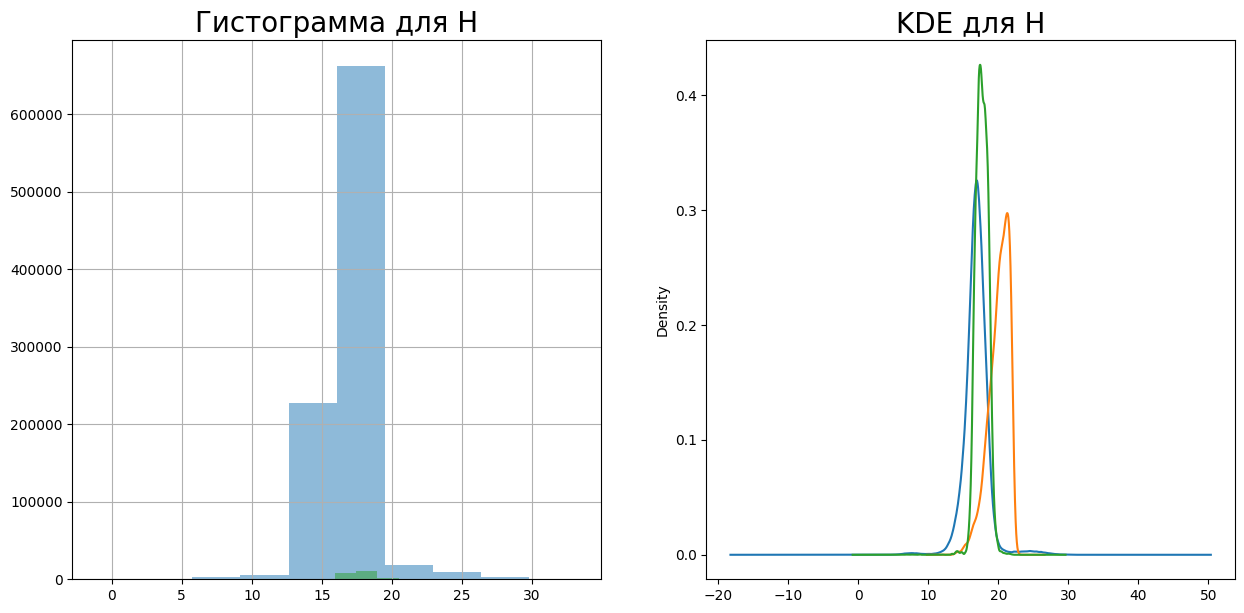

In [ ]:
fig, axs = plt.subplots(1, 2, figsize=(15, 7))
data.groupby("pha")['H'].hist(ax=axs[0], alpha=0.5)
data.groupby("pha")['H'].plot(kind='kde', ax=axs[1])
axs[0].set_title('Гистограмма для H', fontsize=20)
axs[1].set_title('KDE для H', fontsize=20);

Какой из графиков качественнее отображает информацию о данных? С чем это связано?

**Ответ:** <...>

Постройте гистограммы и ядерные оценки плотности для признаков из списка features отдельно для каждого класса.

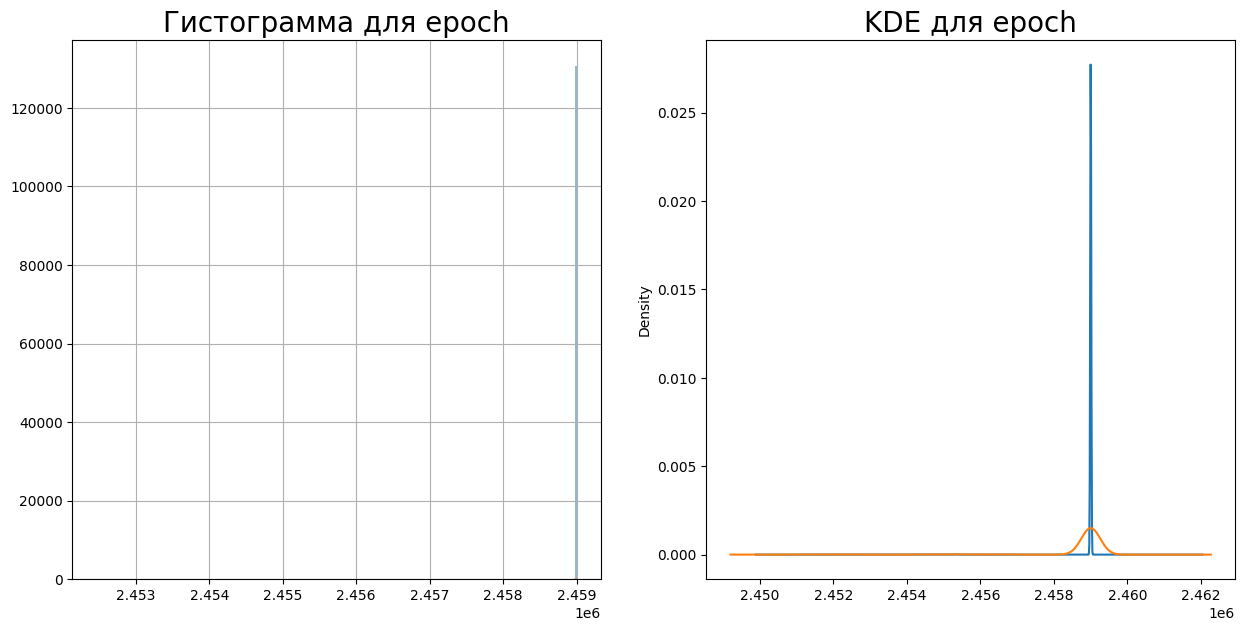

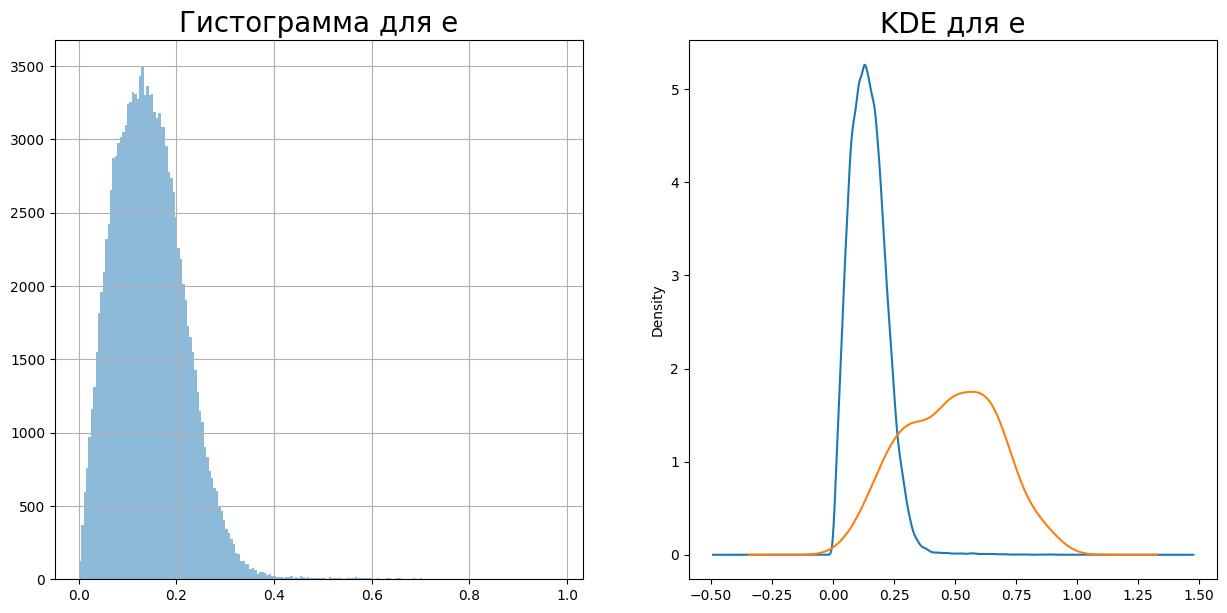

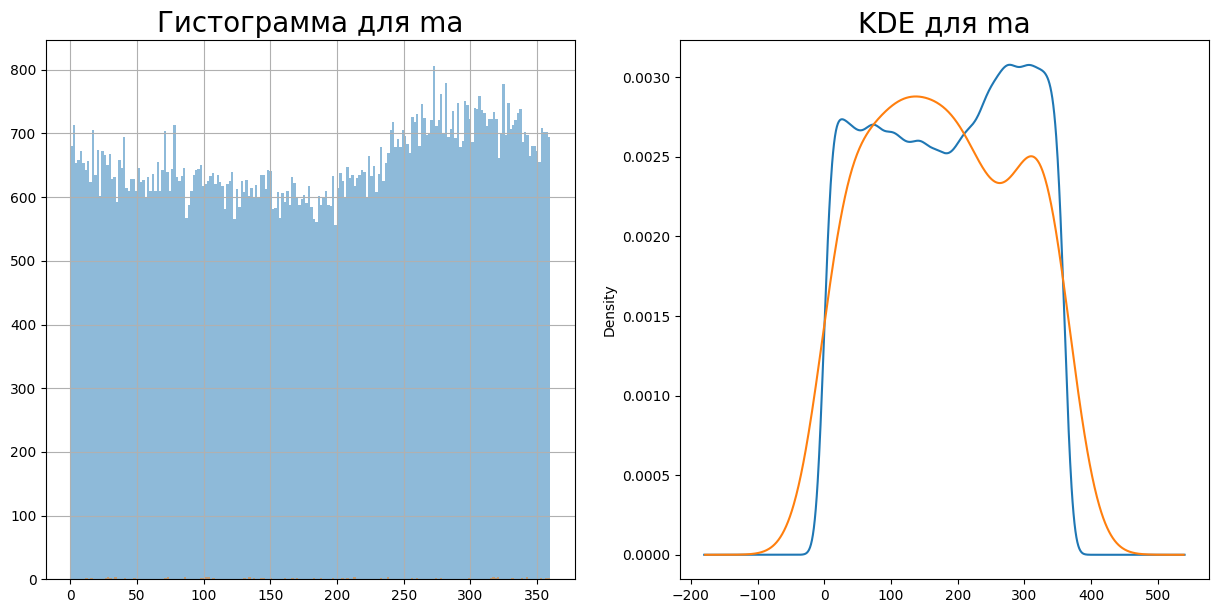

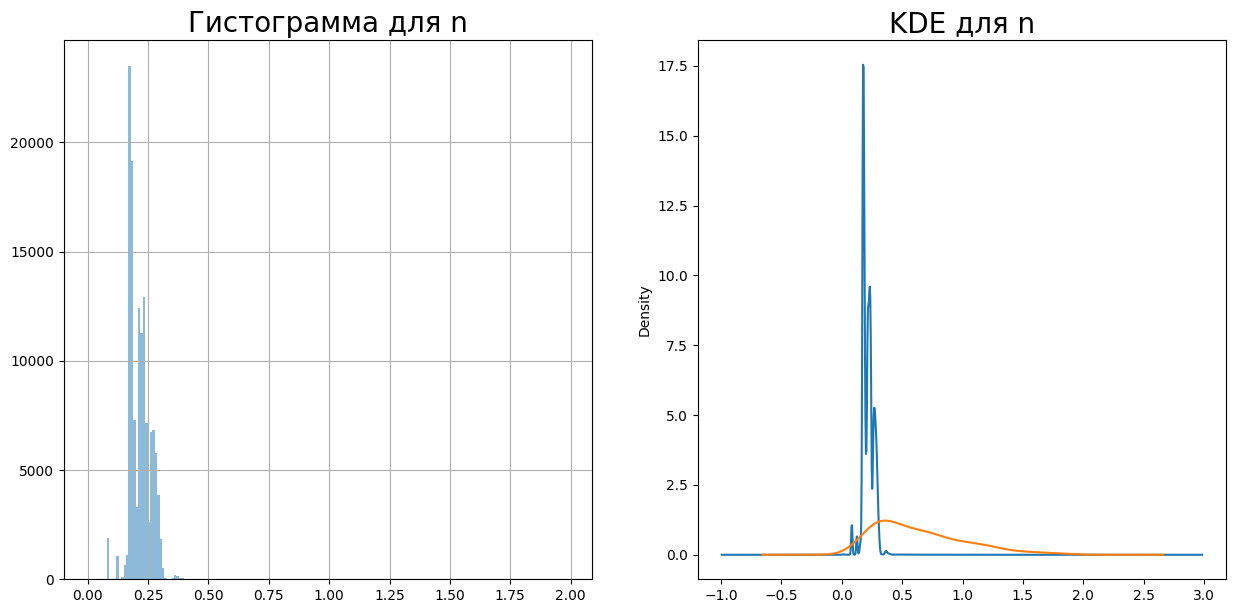

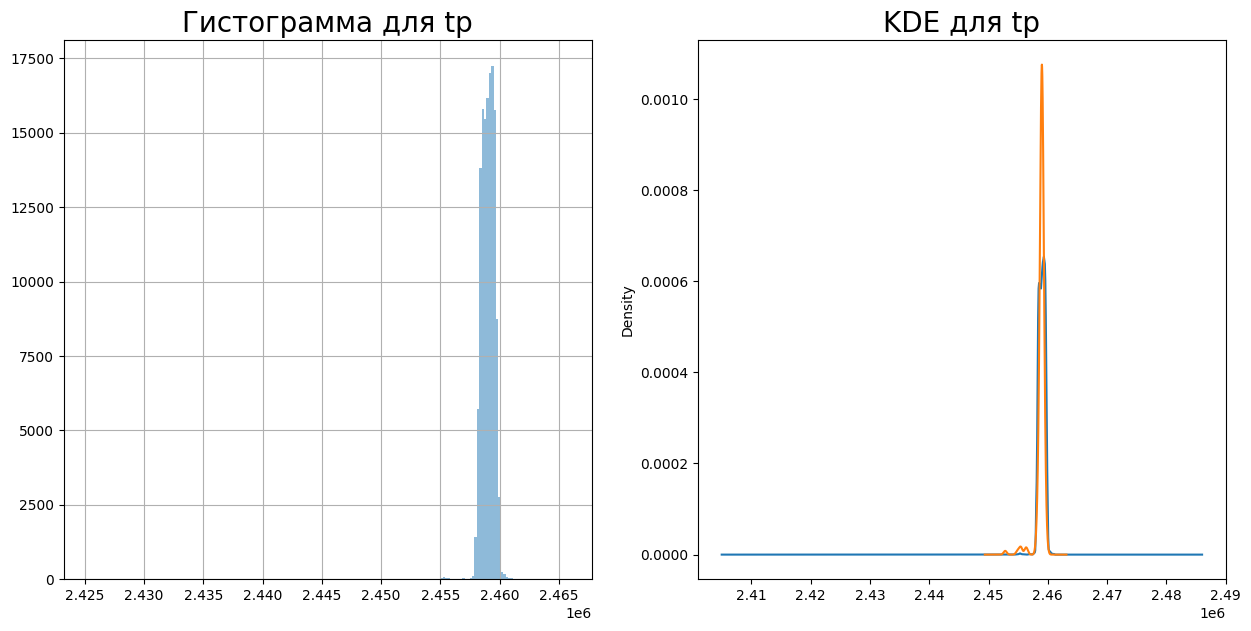

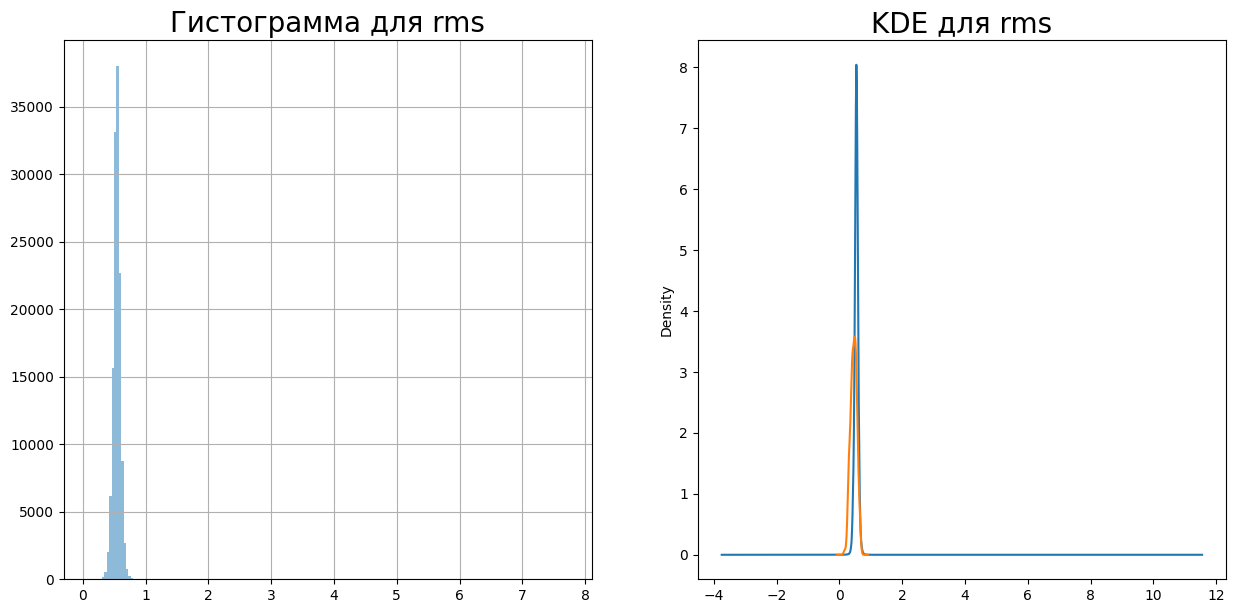

In [ ]:
features = ['epoch', 'e', 'ma', 'n', 'tp', 'rms']
for feature in features:
  fig, axs = plt.subplots(1, 2, figsize=(15, 7))
  data.groupby("pha")[feature].hist(ax=axs[0], alpha=0.5,bins = 200)
  data.groupby("pha")[feature].plot(kind='kde', ax=axs[1])
  axs[0].set_title('Гистограмма для ' + feature, fontsize=20)
  axs[1].set_title('KDE для '+ feature, fontsize=20);

Какие выводы вы можете сделать из полученный графиков?

**Вывод:**<...>

0         0
1         0
2         0
3         0
4         0
         ..
131137    0
131138    0
131139    0
131140    0
131141    0
Name: pha, Length: 131142, dtype: int64

### 2. Обучение модели

Продолжайте использовать выбранные вами данные.

Создайте массив признаков и массив таргета. Разбейте ваши данные на обучающую и тестовую выборки в отношении 7:3.

In [ ]:
X = data[features]
y = data['pha']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.3, random_state=58)

Отмасштабируйте свои признаки.

In [ ]:
X_train = StandardScaler().fit_transform(X_train)
X_test = StandardScaler().fit_transform(X_test)


Обучите модель логистической регрессии.

In [ ]:
model = LogisticRegression().fit(X_train, y_train)
print("Коэффициенты модели: ", *model.coef_[0].round(2))
print("Свободный член: ", *model.intercept_.round(2))

Коэффициенты модели:  -0.02 0.82 -0.17 0.29 0.19 -0.43
Свободный член:  -8.31


Сделайте предсказание для тестовой выборки и оцените качества полученного предсказания.

In [ ]:
accuracy_score(y_test, model.predict(X_test))

0.9984241161070584

**Вывод:** Предсказание оказалось довольно точным




### <font color="orange">Сложная часть</font>


## Задача 2

Как можно было увидеть ранее, оценки коэффициентов становятся слишком большими при наличии некоторых проблем с данными. Чтобы этого не происходило, часто выполняют процедуру *регуляризации* в модели. Вы уже сталкивались с этим в линейной регрессиия, однако регуляризацию также успользуют в решениях задач классификации.

Пусть дана выборка $(x_1, Y_1), ..., (x_n, Y_n)$, где $x_i = (x_{i1}, ..., x_{id}) \in \mathscr{X}$ и случайный класс $Y_i \sim Bern\left(\sigma (\theta^T x_i)\right)$. В задаче логистической регрессии максимизируется функция правдоподобия, а точнее - ее логарифм.
$$L_Y (\theta)= \prod\limits_{i=1}^n \sigma (\theta^T x_i)^{Y_i} \left(1 - \sigma (\theta^T x_i)\right)^{1-Y_i}$$

$$\ell_Y(\theta) = \log L_Y(\theta)$$

$$\ell_Y(\theta) \longrightarrow \max_\theta.$$
Регуляризация заключается в искусственном усечении значений вектора оценок коэффициентов путем добавления его нормы к оптимизируемому функционалу. В случае логистической регрессии мы максимизируем функцию правдоподобия, поэтому норма добавляется со знаком минус. Тем самым решается задача
$$\ell_Y(\theta) - \lambda \|\theta\|^2\longrightarrow \max_\theta.$$
где $\lambda > 0$ &mdash; гиперпараметр модели, то есть число, которое задается пользователем. В данном случае мы получили логистическую регрессию **Ridge-регуляризацией**.

*Замечание.* Такая модель дает некоторое *другое приближение* неизвестной зависимости. Но неправильно думать, что она не может дать "правильный" ответ, потому как понятия "правильный ответ" в подобных задачах не существует. Можно получить только *более качественное приближение* согласно выбранной метрике.

**1.** Выпишите формулу поиска оценки коэффициентов методом *градиентного спуска* и *стохастического градиентного спуска* для
- модели логистической регрессии без регуляризации
- модели логистической регрессии c ridge-регуляризацией

 Не забудьте указать, как математически определяется батч (набор объектов на каждой итерации).

**2.** Многие модели машинного обучения требуют *стандартизацию признаков*. Существует множество различных способов стандартизации, из которых наиболее распространены два следующих.
1. <a target="_blank" href="https://scikit-learn.org/stable/modules/generated/sklearn.preprocessing.StandardScaler.html"><it>StandardScaler</it></a>. Пусть $x_{ij}$ &mdash; значение признака $j$ для объекта $i$. Обозначим $m_j$ &mdash; выборочное среднее значение признака $j$ (функция `np.mean`), а $s^2_j$ &mdash; выборочную дисперсию признака $j$ (функция `np.var`). Тогда стандартизацией является преобразование
$$\widetilde{x}_{ij} = \frac{x_{ij} - m_j}{s_j}.$$
2. <a target="_blank" href="https://scikit-learn.org/stable/modules/generated/sklearn.preprocessing.MinMaxScaler.html"><it>MinMaxScaler</it></a>. Пусть $x_{ij}$ &mdash; значение признака $j$ для объекта $i$. Обозначим $m_j$ и $M_j$ &mdash; минимальное и максимальное значения признака $j$ соответственно. Тогда стандартизацией является преобразование
$$\widetilde{x}_{ij} = \frac{x_{ij} - m_j}{M_j - m_j}.$$

Для модели с ridge-регуляризацией необходима стандартизация. Почему? Можно представить, что признаки имеют некоторые различные единицы измерения.

## Задача 3

В этой задаче вам предстоит реализовать стохастический градиентный спуск, используйте данные из первого задания.

Выберите некоторое начальное приближение оценок коэффициентов, например, в начале координат.

Реализуйте процедуру стохастического градиентного спуска для поиска оценок коэффициентов в модели логистической регрессии. Размер батча (набор объектов на каждой итерации) обычно берут кратно степени двойки, например, 128 или 256.

Нарисуйте графики зависимости значений метрики accuracy от номера итерации для обучающей и валидационной выборок. Сколько итераций пришлось совершить?

Посчитайте ошибку на тестовой выборке.

Сделайте выводы.